# Lab 3 / LLP Simulation Data

PHYS 427\
1/28/2020 (Tue)\
Jin Kyoung Lee

In [1]:
# Importing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import uproot
import pandas as pd

### 1. Importing ROOT data file into notebook

In [2]:
# Importing df_1.root file to the notebook
df_1 = uproot.open("LLPfiles/df_1.root")
df_1

<ROOTDirectory b'/home/atlas/rel/build/bogus/data-ANALYSIS//ANALYSIS.root' at 0x001a21a67250>

In [3]:
df_1.keys()

[b'pandas_tree218;1']

In [4]:
df_1_tree = df_1["pandas_tree218"]

In [5]:
df_1_tree.keys()

[b'RunNumber',
 b'EventNumber',
 b'JetPt',
 b'JetEta',
 b'JetPhi',
 b'IsLLP',
 b'nLLPs_Near_Jets',
 b'Lx',
 b'Ly',
 b'Lz',
 b'Leta',
 b'Lphi',
 b'EMM_BL0',
 b'EMM_BL1',
 b'EMM_BL2',
 b'EMM_BL3',
 b'EMM_EL0',
 b'EMM_EL1',
 b'EMM_EL2',
 b'EMM_EL3',
 b'EH_EL0',
 b'EH_EL1',
 b'EH_EL2',
 b'EH_EL3',
 b'EH_CBL0',
 b'EH_CBL1',
 b'EH_CVL2',
 b'EH_TGL0',
 b'EH_TGL1',
 b'EH_TGL2',
 b'EH_EBL0',
 b'EH_EBL1',
 b'EH_EBL2',
 b'FC_L0',
 b'FC_L1',
 b'FC_L2']

### 2. Loading a file into a pandas DataFrame

In [6]:
# Printing out the data into pandas DataFrame
df1 = df_1_tree.pandas.df(["JetPt","JetEta","JetPhi","IsLLP","L[xyz]"])
df1

,JetPt,JetEta,JetPhi,IsLLP,Lx,Ly,Lz
entry,,,,,,,
0,50.151355,1.767030,0.074290,True,1851.684326,178.223892,5354.035156
1,45.315016,1.088594,0.364831,False,0.000000,0.000000,0.000000
2,163.244844,1.709549,2.769850,True,609.158691,239.010056,1741.357788
3,147.121187,-0.237002,-0.393413,False,0.000000,0.000000,0.000000
4,54.661199,-0.730161,-2.550338,False,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
22571,76.296273,1.114254,-1.709045,True,259.214996,2172.912354,3113.421875
22572,53.958059,0.729737,2.172977,True,499.816559,714.238342,664.080627
22573,44.355902,-1.914020,-1.443047,False,0.000000,0.000000,0.000000


* Jet pT: Transverse momentum
* eta(𝜂): Pseudorapidity. A function of polar angle theta that goes from inf to -inf as theta goes from 0 to pi
* phi(𝜙): Azimuthal angle around the z-axis

### 3. Histograms

In [7]:
# Defining function to make histograms
def hist(varName,binNum):
    varName = df_1_tree.pandas.df([varName])
    sns.set(style = "whitegrid")
    sns.distplot(varName, bins = binNum)

* Histogram for Jet pT

Text(0.5, 0, 'Jet pt')

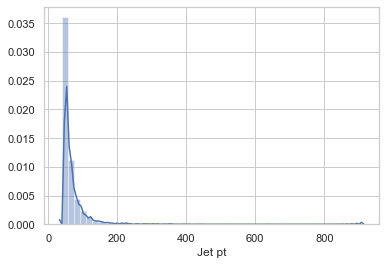

In [8]:
hist("JetPt",50)
plt.xlabel("Jet pt")

* Histogram for Jet eta

Text(0.5, 0, 'Jet Eta')

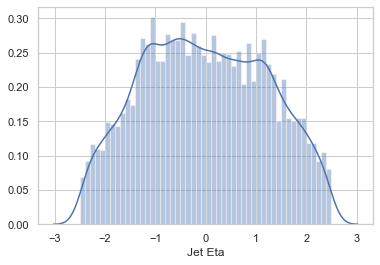

In [9]:
hist("JetEta",50)
plt.xlabel("Jet Eta")

* Histogram for Jet phi

Text(0.5, 0, 'Jet Phi')

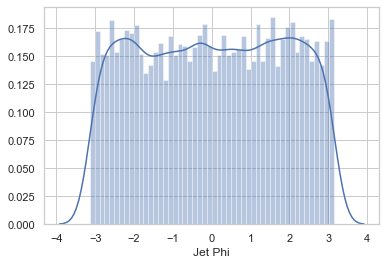

In [10]:
hist("JetPhi",50)
plt.xlabel("Jet Phi")

* Histogram for transverse decay length (Lxy)

In [11]:
# Changing the output container type to plot histogram for decay length
lx, ly, lz = df_1_tree.arrays("L[xyz]", outputtype = tuple)

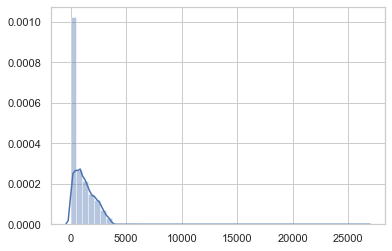

In [12]:
decayLength = []
for i in range(len(lx)):
    length = np.sqrt((lx[i]**2) + (ly[i]**2))
    decayLength.append(length)

sns.distplot(decayLength, bins = 50)

* Histogram for 3D decay length (Lz)

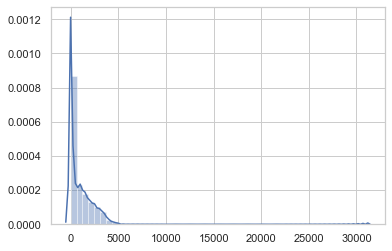

In [13]:
decayLength3d = []
for i in range(len(lz)):
    length3d = np.sqrt((decayLength[i]**2) + (lx[i]**2))
    decayLength3d.append(length3d)
    
sns.distplot(decayLength3d, bins = 50)

### 4. Merging data files into a single pandas DataFrame

In [14]:
# Defining function to put root files into data frame
def df(dfFile, fileName, treeDefine, treeName):
    dfFile = uproot.open(fileName)
    treeDefine = dfFile[treeName]
    return treeDefine.pandas.df(["JetPt","JetEta","JetPhi","IsLLP","L[xyz]"])

In [15]:
# Assigning dataframes
df2 = df("df_2","LLPfiles/df_2.root","df_2_tree","pandas_tree51358")
df3 = df("df_3","LLPfiles/df_3.root","df_3_tree","pandas_tree53278")
df4 = df("df_4","LLPfiles/df_4.root","df_4_tree","pandas_tree52558")
df5 = df("df_5","LLPfiles/df_5.root","df_5_tree","pandas_tree53038")
df6 = df("df_6","LLPfiles/df_6.root","df_6_tree","pandas_tree54718")

In [16]:
# Merging files into single DataFrame
dfMerged = [df1,df2,df3,df4,df5,df6]
df_keys = pd.concat(dfMerged,keys=['df1','df2','df3','df4','df5','df6']) # categorizing the files
df_keys

JetPt    JetEta    JetPhi  IsLLP           Lx           Ly  \
    entry                                                                      
df1 0         50.151355  1.767030  0.074290   True  1851.684326   178.223892   
    1         45.315016  1.088594  0.364831  False     0.000000     0.000000   
    2        163.244844  1.709549  2.769850   True   609.158691   239.010056   
    3        147.121187 -0.237002 -0.393413  False     0.000000     0.000000   
    4         54.661199 -0.730161 -2.550338  False     0.000000     0.000000   
...                 ...       ...       ...    ...          ...          ...   
df6 1695822  216.514703  0.155385  2.572538   True  2221.168945  1310.453613   
    1695823  100.025234  0.468585  0.328753  False     0.000000     0.000000   
    1695824   88.622664  1.336524 -0.449329  False     0.000000     0.000000   
    1695825   79.377008  0.741856 -0.320374  False     0.000000     0.000000   
    1695826   63.754262  1.006141 -2.172019  False     0.000000     0.000000   

                      Lz  
    entry                 
df1 0        5354.035156  
    1           0.000000  
    2        1741.357788  
    3           0.000000  
    4           0.000000  
...                  ...  
df6 1695822   443.914246  
    1695823     0.000000  
    1695824     0.000000  
    1695825     0.000000  
    1695826     0.000000  

[3448258 rows x 7 columns]

### 5. Violin plot for jet pT

In [17]:
# Calling jet pT for each file
df1_pt = df_keys.loc['df1','JetPt']
df2_pt = df_keys.loc['df2','JetPt']
df3_pt = df_keys.loc['df3','JetPt']
df4_pt = df_keys.loc['df4','JetPt']
df5_pt = df_keys.loc['df5','JetPt']
df6_pt = df_keys.loc['df6','JetPt']

In [18]:
# Merging jet pT data
jetPtMerged = [df1_pt,df2_pt,df3_pt,df4_pt,df5_pt,df6_pt]

In [19]:
# Plotting violin plot for jet pT for all data
def violin(dataMerged):
    plt.figure(figsize = (20, 10))
    sns.set(style = "whitegrid")
    jetPt_violin = sns.violinplot(data = dataMerged)
    jetPt_violin.set_xticklabels(['df1','df2','df3','df4','df5','df6'])

Text(0.5, 0, 'Jet pT')

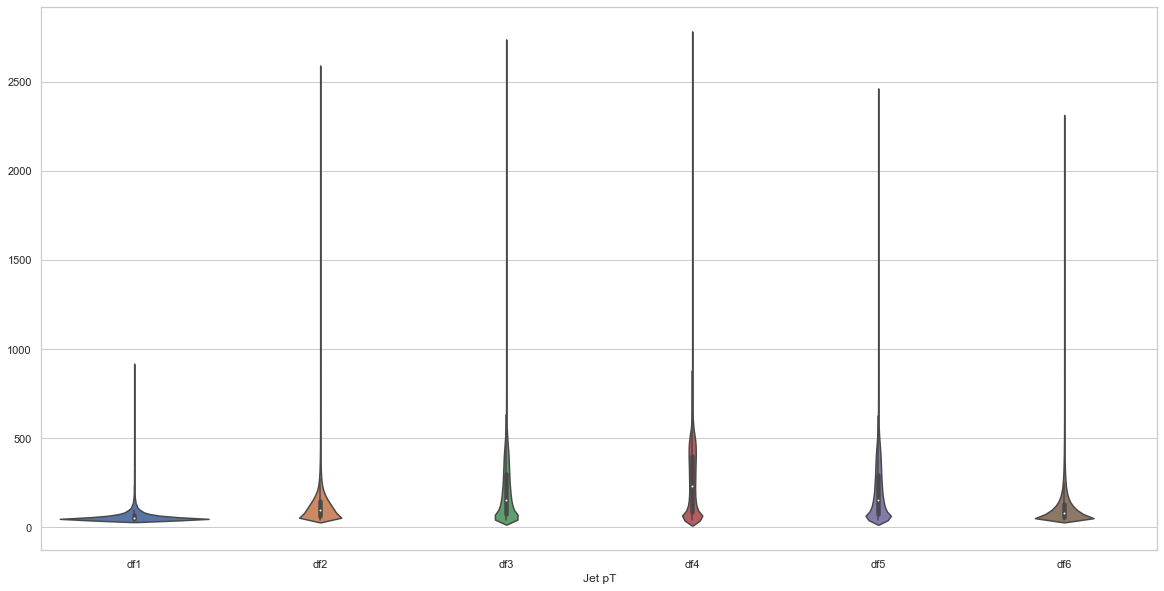

In [20]:
violin(jetPtMerged)
plt.xlabel("Jet pT")

### 6. Violin plots for decay length

* Violin plot for 2D decay length

In [21]:
# Defining function to find decay length Lxy
def decayL2d(dfNum):
    return np.sqrt((df_keys.Lx[dfNum]**2) + (df_keys.Ly[dfNum]**2))

In [22]:
df1_decayL2d = decayL2d("df1")
df2_decayL2d = decayL2d("df2")
df3_decayL2d = decayL2d("df3")
df4_decayL2d = decayL2d("df4")
df5_decayL2d = decayL2d("df5")
df6_decayL2d = decayL2d("df6")

Text(0.5, 0, 'Decay length Lxy')

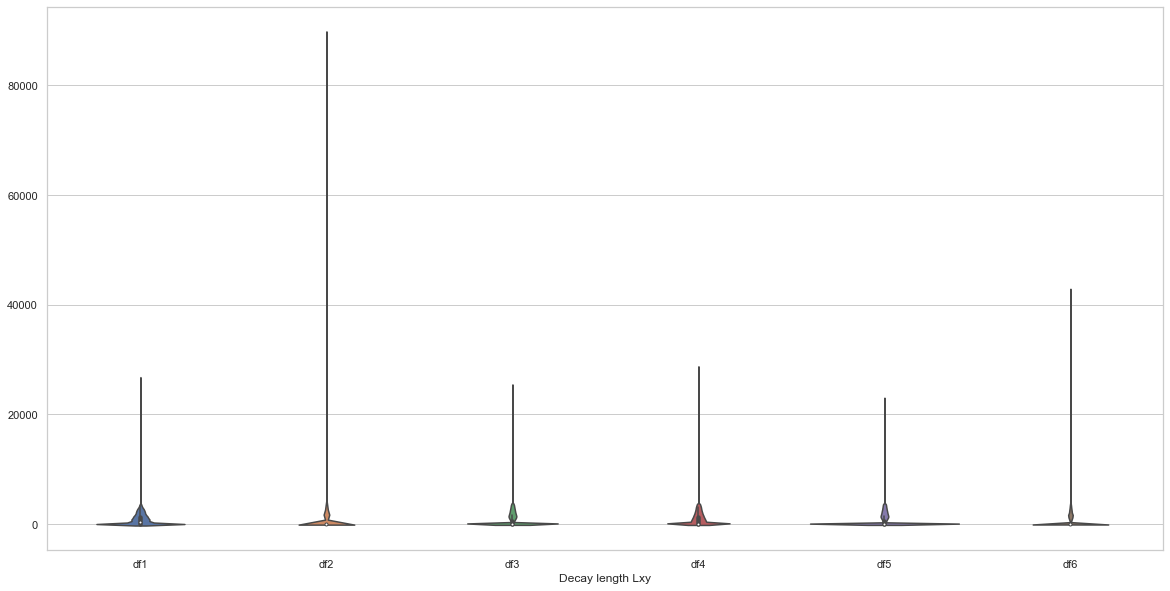

In [23]:
decay2d_Merged = [df1_decayL2d,df2_decayL2d,df3_decayL2d,df4_decayL2d,df5_decayL2d,df6_decayL2d]

# Plotting violin plot for ecay length Lxy
violin(decay2d_Merged)
plt.xlabel("Decay length Lxy")

* Violin plot for 3D decay length

In [24]:
# Defining function to find decay length Lz
def decayL3d(dfNum):
    return np.sqrt((df_keys.Lx[dfNum]**2) + (df_keys.Ly[dfNum]**2 + df_keys.Lz[dfNum]**2))

In [25]:
df1_decayL3d = decayL3d("df1")
df2_decayL3d = decayL3d("df2")
df3_decayL3d = decayL3d("df3")
df4_decayL3d = decayL3d("df4")
df5_decayL3d = decayL3d("df5")
df6_decayL3d = decayL3d("df6")

Text(0.5, 0, 'Decay length Lz')

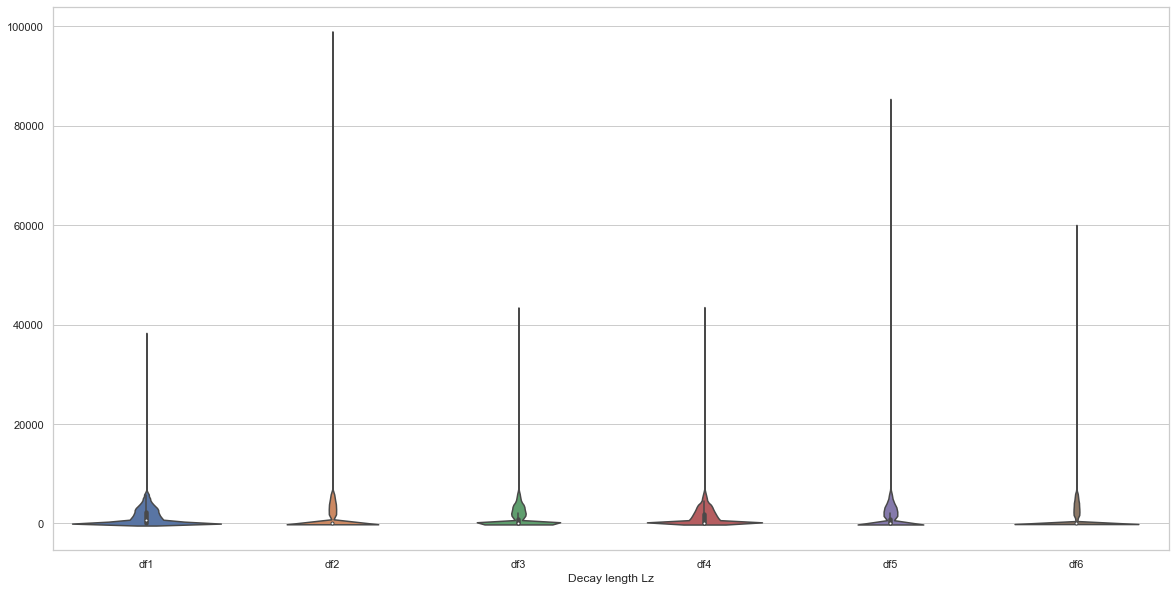

In [26]:
decay3d_Merged = [df1_decayL3d,df2_decayL3d,df3_decayL3d,df4_decayL3d,df5_decayL3d,df6_decayL3d]

# Plotting violin plot for ecay length Lz
violin(decay3d_Merged)
plt.xlabel("Decay length Lz")

### 7. Violin plots for jets associated with an LLP and not

* Violin plot for jets that are associated with an LLP

In [27]:
# Filtering jets that are associated with LLP (IsLLP = True)
df_isLLP = df_keys[df_keys.IsLLP.eq(True)]

In [28]:
# Calling jet pT associated with LLP
df1_IsLLP = df_isLLP.loc['df1','JetPt']
df2_IsLLP = df_isLLP.loc['df2','JetPt']
df3_IsLLP = df_isLLP.loc['df3','JetPt']
df4_IsLLP = df_isLLP.loc['df4','JetPt']
df5_IsLLP = df_isLLP.loc['df5','JetPt']
df6_IsLLP = df_isLLP.loc['df6','JetPt']

Text(0.5, 0, 'Jet pT (LLP = True)')

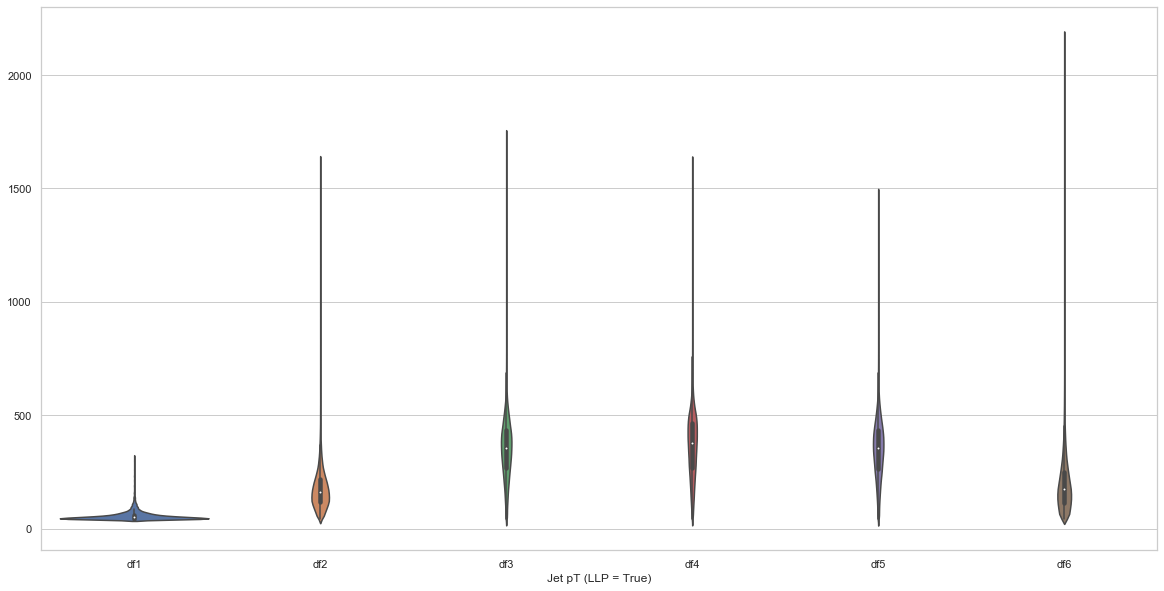

In [29]:
# Merging jet pT that are associated with LLP
jetPt_isLLP_Merged = [df1_IsLLP,df2_IsLLP,df3_IsLLP,df4_IsLLP,df5_IsLLP,df6_IsLLP]

# Plotting violin plot for jet pT that are associated with LLP
violin(jetPt_isLLP_Merged)
plt.xlabel("Jet pT (LLP = True)")

* Violin plot for jets that are not associated with an LLP

In [30]:
# Filtering jets that are not associated with LLP (IsLLP = False)
df_notLLP = df_keys[df_keys.IsLLP.eq(False)]

In [31]:
# Calling jet pT not associated with LLP
df1_notLLP = df_notLLP.loc['df1','JetPt']
df2_notLLP = df_notLLP.loc['df2','JetPt']
df3_notLLP = df_notLLP.loc['df3','JetPt']
df4_notLLP = df_notLLP.loc['df4','JetPt']
df5_notLLP = df_notLLP.loc['df5','JetPt']
df6_notLLP = df_notLLP.loc['df6','JetPt']

Text(0.5, 0, 'Jet pT (LLP = False)')

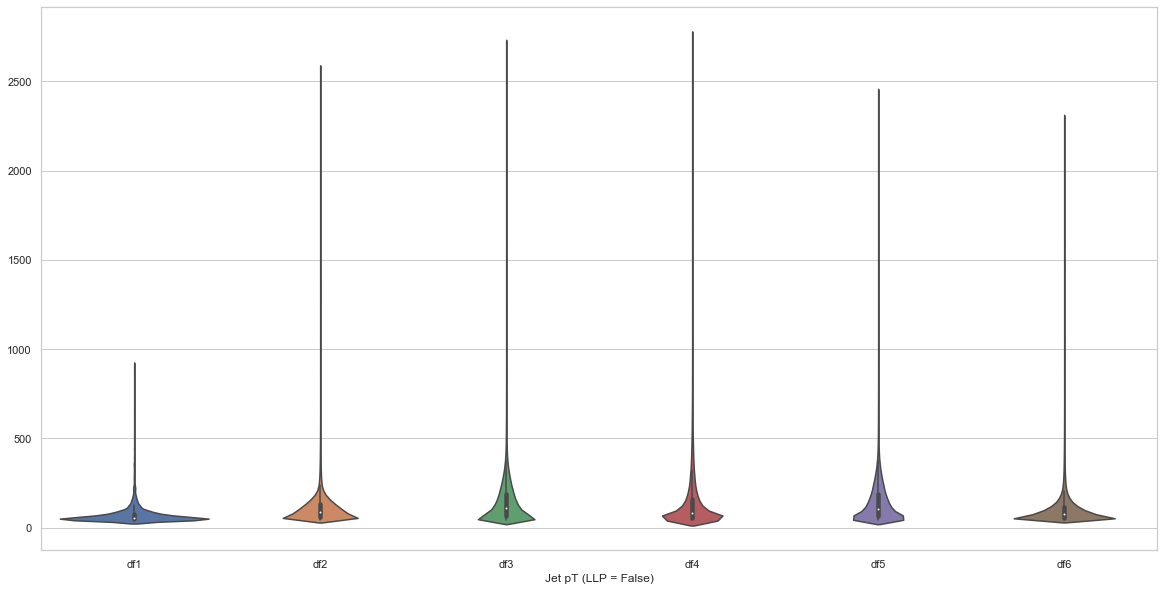

In [32]:
# Merging jet pT that are not associated with LLP
jetPt_notLLP_Merged = [df1_notLLP,df2_notLLP,df3_notLLP,df4_notLLP,df5_notLLP,df6_notLLP]

# Plotting violin plot for jet pT that are associated with LLP
violin(jetPt_notLLP_Merged)
plt.xlabel("Jet pT (LLP = False)") 

### 8.

In [87]:
# Determining decay length Lxy for all samples together
def decayL2d_isLLP(dfNum):
    return np.sqrt((df_isLLP.Lx[dfNum]**2) + (df_isLLP.Ly[dfNum]**2))

In [88]:
decayL2d_isLLP1 = decayL2d_isLLP("df1")
decayL2d_isLLP2 = decayL2d_isLLP("df2")
decayL2d_isLLP3 = decayL2d_isLLP("df3")
decayL2d_isLLP4 = decayL2d_isLLP("df4")
decayL2d_isLLP5 = decayL2d_isLLP("df5")
decayL2d_isLLP6 = decayL2d_isLLP("df6")

Text(0.5, 0, 'Decay length Lxy (LLP = True)')

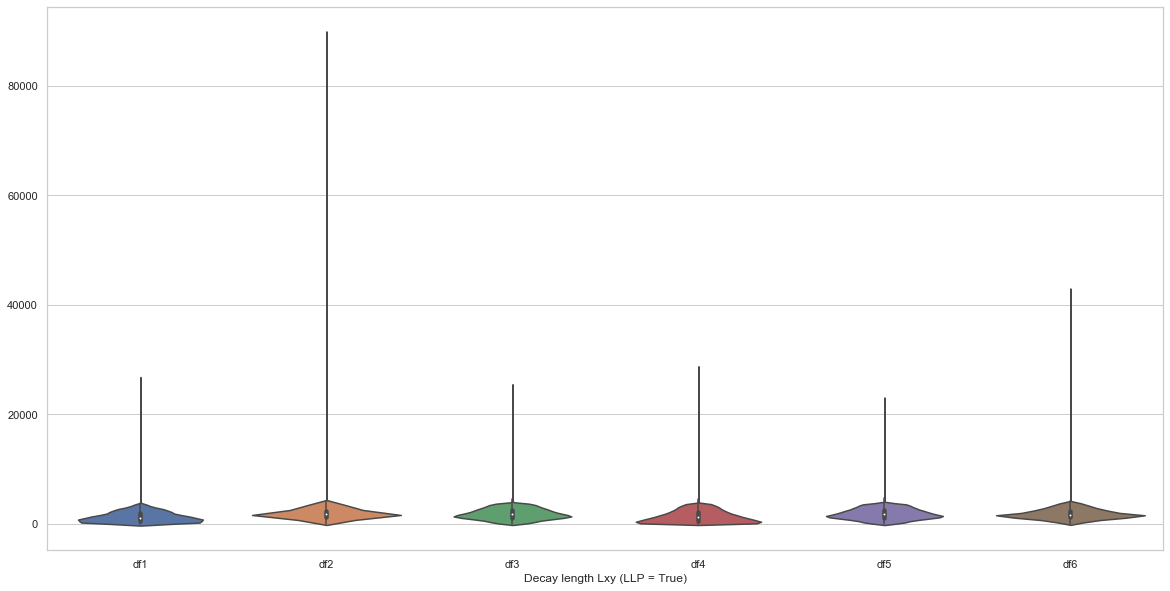

In [90]:
decayL2d_isLLP_Merged = [decayL2d_isLLP1,decayL2d_isLLP2,decayL2d_isLLP3,decayL2d_isLLP4,decayL2d_isLLP5,decayL2d_isLLP6]

# Plotting violin plot for decay length Lxy that are associated with LLP
violin(decayL2d_isLLP_Merged)
plt.xlabel("Decay length Lxy (LLP = True)") 